# Classification and Model Evaluation

In this lesson, we will use cross-validation and evaluation metrics to compare two models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn import svm
from sklearn.model_selection import KFold 
from scipy import stats 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("./data-tergul7/Titanic_final.csv", index_col=0)
df.head()

,Survived,Pclass,SibSp,Parch,Sex_cat,Embarked_cat,Title_cat,Is_Alone,Fare_min_max,Age_norm
0,0,3,1,0,1,2,2,0,0.014151,-0.517838
1,1,1,1,0,0,0,3,0,0.139129,0.615799
2,1,3,0,0,0,2,1,1,0.015478,-0.234429
3,1,1,1,0,0,2,3,0,0.103644,0.403242
4,0,3,0,0,1,2,2,1,0.015713,0.403242


In [3]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

### SVM classifier.
The algorithm classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space. <br>
Hyperparameter:
- C: Regularization, a smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
- Kernel: The function that used to transform the original training data into a higher dimension.

In [4]:
clf_a = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_a.fit(X_train, y_train)
y_pred = clf_a.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

     0   1
0  119  15
1   22  67
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       134
           1       0.82      0.75      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



- nmacro average: averaging the unweighted mean per label <br>
- weighted average: averaging the support-weighted mean per label

### ROC curve

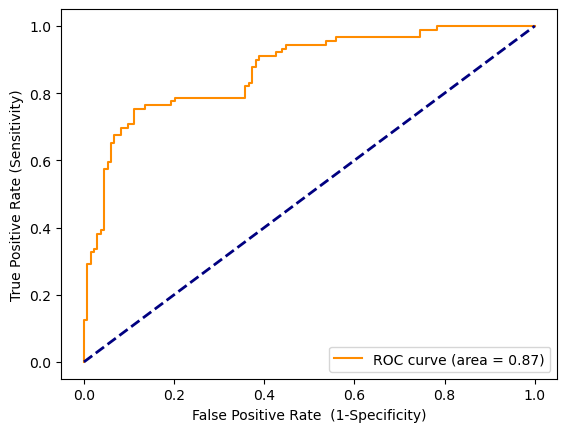

In [5]:
y_probs_a = clf_a.predict_proba(X_test) # probability prediction
fpr_a, tpr_a, threshold = metrics.roc_curve(y_test, y_probs_a[:,1])
auc_a = metrics.auc(fpr_a, tpr_a)
plt.figure()
plt.plot(fpr_a, tpr_a, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_a)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

In [6]:
roc = pd.DataFrame({'fpr': fpr_a, 'tpr': tpr_a, 't': threshold})

In [7]:
roc.head(10)

,fpr,tpr,t
0,0.000000,0.000000,inf
1,0.000000,0.011236,0.889565
2,0.000000,0.123596,0.864349
3,0.007463,0.123596,0.864091
4,0.007463,0.292135,0.852212
5,0.014925,0.292135,0.851746
6,0.014925,0.325843,0.847645
7,0.022388,0.325843,0.846780
8,0.022388,0.337079,0.846293
9,0.029851,0.337079,0.844725


In [8]:
roc[roc['tpr']>0.75].head(10)

,fpr,tpr,t
26,0.111940,0.752809,0.594262
27,0.134328,0.752809,0.313770
28,0.134328,0.764045,0.303669
29,0.194030,0.764045,0.225042
30,0.194030,0.775281,0.222866
31,0.201493,0.775281,0.212635
32,0.201493,0.786517,0.212290
33,0.358209,0.786517,0.152216
34,0.358209,0.820225,0.151550
35,0.365672,0.820225,0.151542


### Naive Bayes classifier 
The algorithms based on applying Bayes’ theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. 

In [9]:
clf_b = GaussianNB()
clf_b.fit(X_train, y_train)
y_pred = clf_b.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

,0,1
0,104,30
1,19,70


              precision    recall  f1-score   support

           0       0.85      0.78      0.81       134
           1       0.70      0.79      0.74        89

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.78      0.78       223



### ROC curve

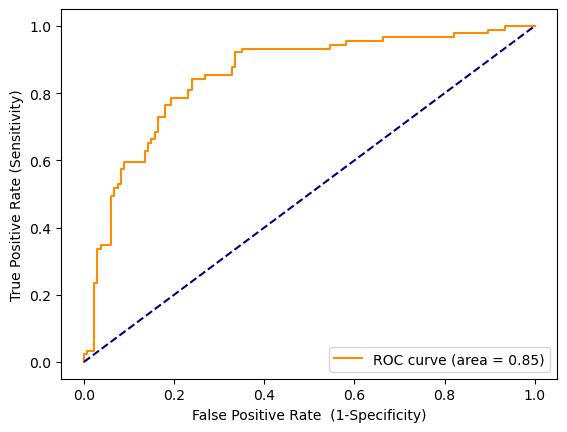

In [10]:
y_probs_b = clf_b.predict_proba(X_test) # probability prediction
fpr_b, tpr_b, _ = metrics.roc_curve(y_test, y_probs_b[:,1])
auc_b = metrics.auc(fpr_b, tpr_b)
plt.figure()
plt.plot(fpr_b, tpr_b, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

## ROC curve comparison

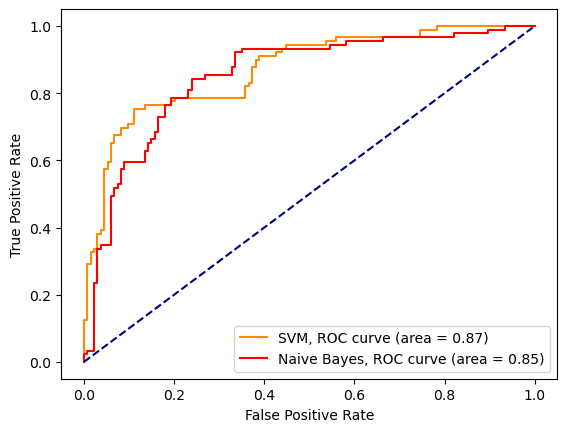

In [11]:
plt.figure()
plt.plot(fpr_a, tpr_a, color='darkorange', label='SVM, ROC curve (area = %0.2f)' %  auc_a)
plt.plot(fpr_b, tpr_b, color='red', label='Naive Bayes, ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Model evaluation

Confusion matrix: 

|  | predicted negative | predicted positive |
|:--- | :---: | :---: |
| actual negative | TN | FP|
| actual positive | FN | TP|

- Sensitivity = Recall =  $ \frac{TP}{TP+FN} $ 
- Specificity = $ \frac{TN}{TN +FP} $
- Precision = $ \frac{TP}{TP+FP}$ 
- f1-score = $ \frac{2*precision*recall}{precision+recall}$

#### What is the evaluation metric we should use in this problem?

### Comparison between two classifiers:

In [12]:
clf_list = [clf_a,clf_b]
result_dict ={}
cm_dict, auc_dict = {}, {}
X = X.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test,y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        clf_dict = result_dict.get(clf, {})
        accuracy_list = clf_dict.get('accuracy',[])
        accuracy_list.append(accuracy)
        clf_dict['accuracy'] = accuracy_list
        precision_list = clf_dict.get('precision',[])
        precision_list.append(precision)
        clf_dict['precision'] = precision_list
        auc_list = clf_dict.get('auc',[])
        auc_list.append(auc)
        clf_dict['auc'] = auc_list
        result_dict[clf] = clf_dict
#         auc_list = auc_dict.get(clf,[])
#         auc_list.append(auc)
#         auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("AUC " ,auc)
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

------ 1 ------
Classifier:  SVC(C=0.9, probability=True)
AUC  0.8878600823045267
Accuracy:  0.8444444444444444
Classifier:  GaussianNB()
AUC  0.8786008230452674
Accuracy:  0.7888888888888889
------ 2 ------
Classifier:  SVC(C=0.9, probability=True)
AUC  0.8596491228070176
Accuracy:  0.8089887640449438
Classifier:  GaussianNB()
AUC  0.8374613003095975
Accuracy:  0.7752808988764045
------ 3 ------
Classifier:  SVC(C=0.9, probability=True)
AUC  0.8721413721413722
Accuracy:  0.8539325842696629
Classifier:  GaussianNB()
AUC  0.852910602910603
Accuracy:  0.8202247191011236
------ 4 ------
Classifier:  SVC(C=0.9, probability=True)
AUC  0.7994350282485876
Accuracy:  0.797752808988764
Classifier:  GaussianNB()
AUC  0.793220338983051
Accuracy:  0.7865168539325843
------ 5 ------
Classifier:  SVC(C=0.9, probability=True)
AUC  0.8673890608875129
Accuracy:  0.8764044943820225
Classifier:  GaussianNB()
AUC  0.8581011351909186
Accuracy:  0.8314606741573034
------ 6 ------
Classifier:  SVC(C=0.9, pro

### Print average results:

In [13]:
for clf in clf_list:
    print(clf)
    accuracy_list = result_dict[clf]['accuracy']
    print("mean accuracy: ", np.mean(accuracy_list))
    precision_list = result_dict[clf]['precision']
    print("mean precision: ", np.mean(precision_list))
    auc_list = result_dict[clf]['auc']
    print("mean auc: ", np.mean(auc_list))

SVC(C=0.9, probability=True)
mean accuracy:  0.8293882646691635
mean precision:  0.8099864286251982
mean auc:  0.8497400153808865
GaussianNB()
mean accuracy:  0.8013607990012485
mean precision:  0.7230877171614232
mean auc:  0.8427647038703929


### Statistical Significance Tests
Two-sided test for the null hypothesis that two related or repeated samples have identical average (expected) values.

In [14]:
ttest,pval = stats.ttest_rel(result_dict[clf_a]['precision'], result_dict[clf_b]['precision'])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 3.592151066850198e-06
reject null hypothesis


In [15]:
ttest,pval = stats.ttest_rel(result_dict[clf_a]['accuracy'], result_dict[clf_b]['accuracy'])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.00023631157612405545
reject null hypothesis


In [16]:
ttest,pval = stats.ttest_rel(result_dict[clf_a]['auc'], result_dict[clf_b]['auc'])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.42511281086451247
accept null hypothesis
